# Performance Comparison

This notebook compares performances of Multi-label classification methods for the [academia.stackexchange.com](https://academia.stackexchange.com/).

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Prerequesits](#pre)
* [Performance Comparison](#comparison)

In [71]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from pathlib import Path
plt.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='data_import'/>

## Data import

In [36]:
from academia_tag_recommender.classifier import available_classifier_paths
paths = available_classifier_paths(recursive=True)

<a id='pre'/>

## Prerequesits

Since the resulting classifier will act as a Recommender, the suggested labels will be evaluated by a human being. Therefore the classifier should prefer to offer more labels than less. Because of this assumption the classifiers will be evaluated and tuned for recall. Since each label itself has to have a high recall, the macro setting is used as optimization criterion.
[Notebook 3.0](3.0-me-evaluation-metrics.ipynb) contains a more detailed explanation of *recall macro*.


<a id='comparison'/>

## Performance Comparison



**Comparing transformer performance over all classifier**

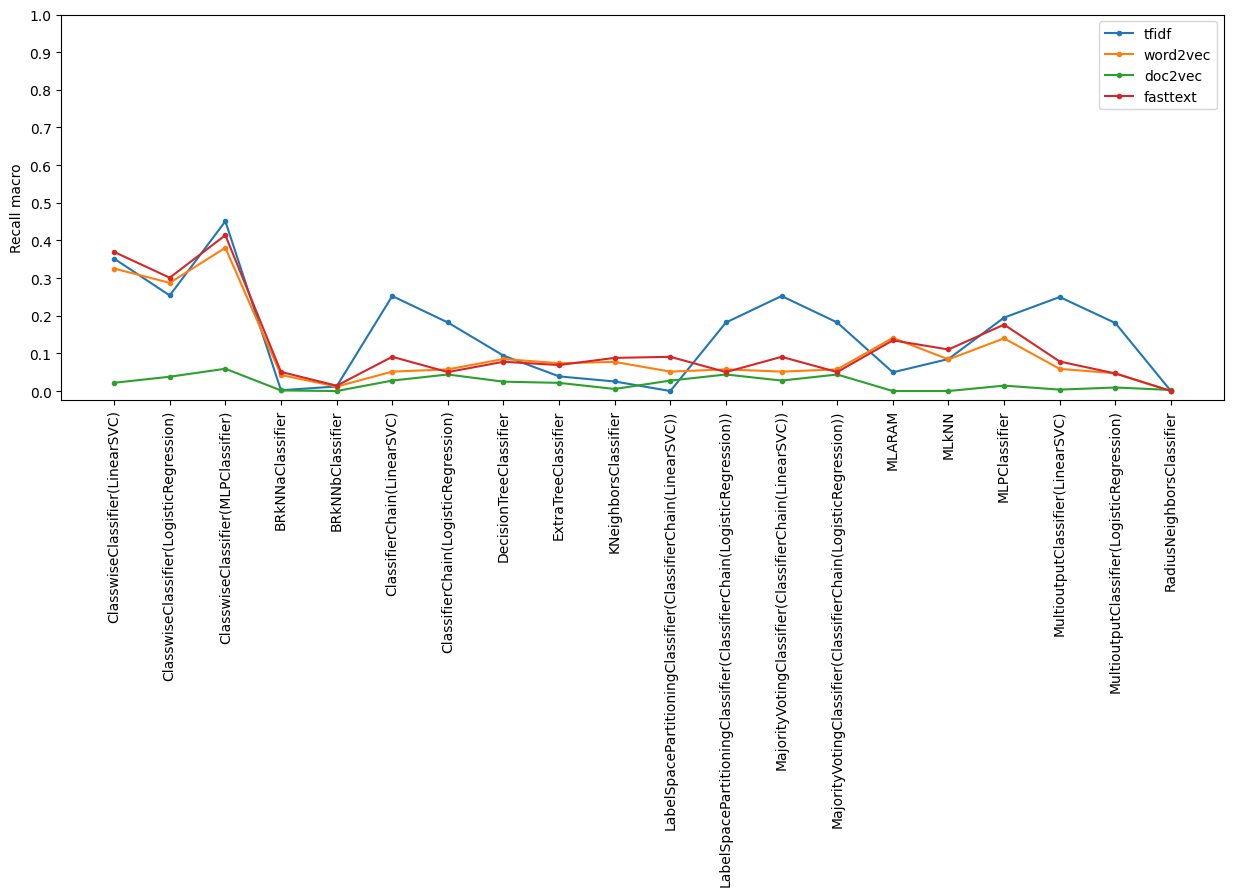

In [171]:
transformer = ['tfidf', 'word2vec', 'doc2vec', 'fasttext']
classifier = ['ClasswiseClassifier(LinearSVC)', 'ClasswiseClassifier(LogisticRegression)', 'ClasswiseClassifier(MLPClassifier)', 
              'BRkNNaClassifier', 'BRkNNbClassifier', 
              'ClassifierChain(LinearSVC)', 'ClassifierChain(LogisticRegression)', 
              'DecisionTreeClassifier', 'ExtraTreeClassifier', 'KNeighborsClassifier', 
              'LabelSpacePartitioningClassifier(ClassifierChain(LinearSVC))', 'LabelSpacePartitioningClassifier(ClassifierChain(LogisticRegression))', 
              'MajorityVotingClassifier(ClassifierChain(LinearSVC))', 'MajorityVotingClassifier(ClassifierChain(LogisticRegression))', 
              'MLARAM', 'MLkNN', 'MLPClassifier', 
              'MultioutputClassifier(LinearSVC)', 'MultioutputClassifier(LogisticRegression)', 'RadiusNeighborsClassifier']

def get_evals(pth):
    evals = [(classifier_, 0) for classifier_ in classifier]
    for path in paths:
        for i, classifier_ in enumerate(classifier):
            if pth in path.name and classifier_ in path.name and '-' not in path.name:
                clf = load(path)
                evals[i] = (classifier_, clf.evaluation.recall_macro)
    return evals

y_pos = np.arange(len(classifier))

fig, ax = plt.subplots(figsize=(15,5))
for transform in transformer:
    evals = get_evals(transform)
    ax.plot(y_pos, [eval_[1] for eval_ in evals], marker=".", label=transform)
ax.set_xticks(y_pos)
ax.set_xticklabels(classifier, rotation=90)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_ylabel('Recall macro')
ax.legend(loc='best')
ax.set_title('')
plt.show()

**Comparing vector size for embedding transformer**

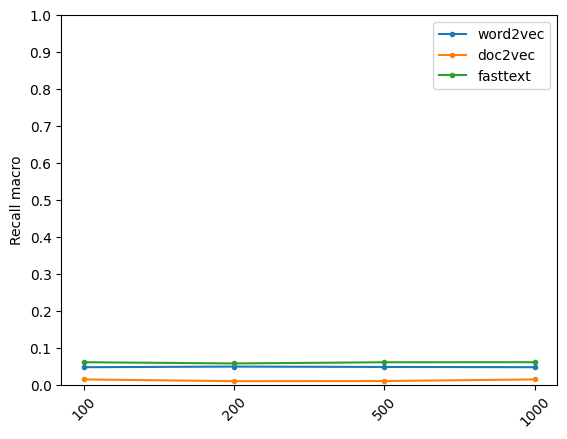

In [151]:
transformer = ['word2vec', 'doc2vec', 'fasttext']
vector_sizes = [100, 200, 500, 1000]

def get_evals(pth):
    evals = np.zeros(len(vector_sizes))
    for path in paths:
        for i, size in enumerate(vector_sizes):
            if pth in path.name and str(size) in path.name:
                clf = load(path)
                name = str(clf).split('&')[0]
                evals[i] = clf.evaluation.recall_macro
    return evals

x = np.arange(len(vector_sizes))

fig, ax = plt.subplots()
for transform in transformer:
    ax.plot(x, get_evals(transform), marker=".", label=transform)
ax.set_xticks(x)
ax.set_xticklabels(vector_sizes, rotation=45)
ax.set_yticks(np.linspace(0, 1, 11))
ax.set_ylabel('Recall macro')
ax.set_title('')
ax.legend(loc='best')
ax.legend(loc='best')

plt.show()

vary **Classifier[ClasswiseClassifier w/o undersampling]**, vary **Vectorizer[Tfidf, word2vec, doc2vec, fasttext]**

vary **Classifier[ClasswiseClassifier w/o Gridsearch]**, vary **Vectorizer[Tfidf, word2vec, doc2vec, fasttext]**